In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
os.chdir("/home/pchabets/Dropbox/STRESS_INDEX/")

### Load in transcriptomics data

In [3]:
expr = pd.read_csv("data/blood_and_saliva_variables/W1/transcriptomics/transcriptomics_2ychronicity.csv")

### Look at distribution of label over different batches

<AxesSubplot:xlabel='plate'>

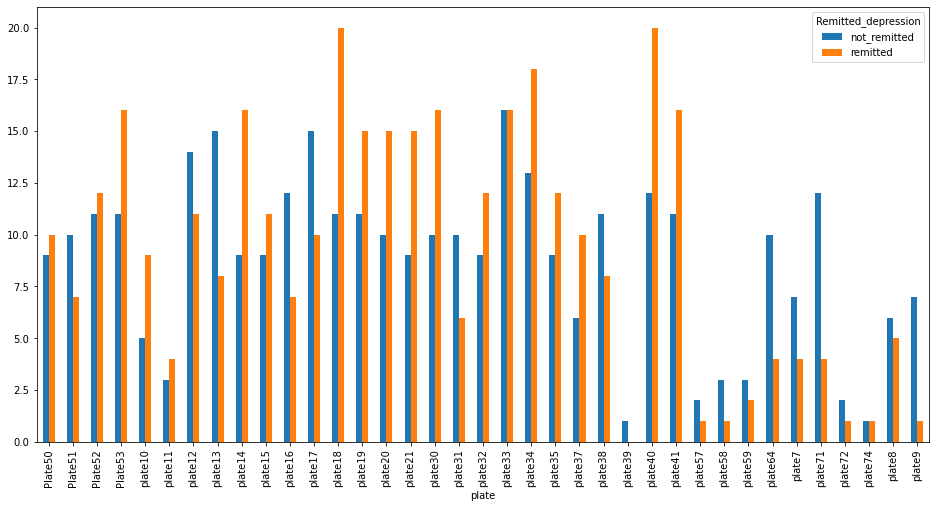

In [4]:
expr.groupby('Remitted_depression')['plate'].value_counts().unstack().transpose().plot.bar(figsize=(16,8))

<AxesSubplot:xlabel='plate', ylabel='Remitted_depression'>

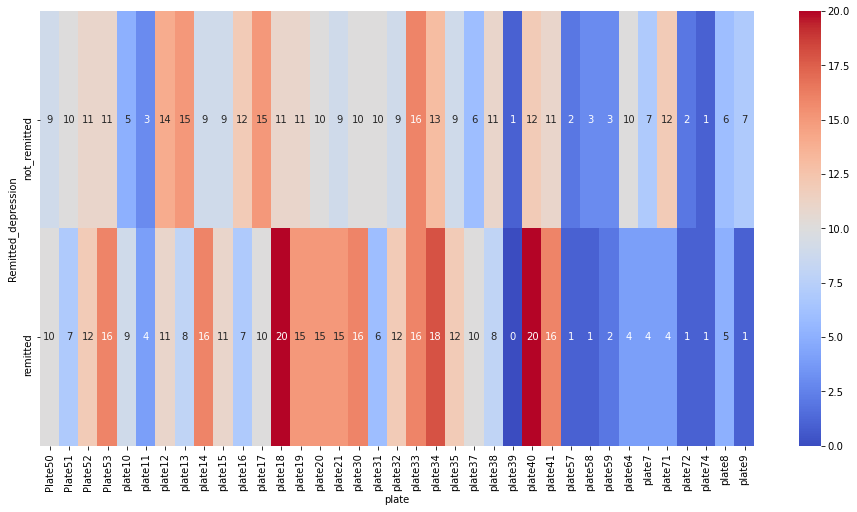

In [5]:
contigency = pd.crosstab(expr['Remitted_depression'], expr['plate'])

plt.figure(figsize=(16,8)) 
sns.heatmap(contigency, annot=True, cmap="coolwarm")

#### Chi-square test to test if batch distribution differences are statistically significant (p<0.05)

In [6]:
from scipy.stats import chi2_contingency

# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contigency) 

print("P-value: {}".format(p))
print("X2-statistic: {}".format(c))
print("Degrees of freedom: {}".format(dof))

print("\nConclusion: no batch correction needed for the current classification task.") if p >= 0.05 else print("\nConclusion: batch correction needed for classification")

P-value: 0.3647530371726598
X2-statistic: 38.31797573955588
Degrees of freedom: 36

Conclusion: no batch correction needed for the current classification task.
